# 6.2 VGG16

### 导入utils中的DataLoader

In [1]:
from utils import *

In [2]:
train_loader, val_loader = get_cifar10()

借助PyTorch内置的nn.Sequential类构建模型。

In [3]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.cnn =  nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  
        
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  

            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), 
        
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [4]:
from torchsummary import summary
## 需要预先下载，在终端输入 pip install torchsummary
IMSIZE = 32
vgg16_model = VGG16().cuda()
summary(vgg16_model, (3, IMSIZE, IMSIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

## 模型训练

先定义几个训练中会用到的函数。

输入参数epochs和lr，实施训练。

In [6]:
lr = 1e-3
optimizer = torch.optim.Adam(vgg16_model.parameters(), lr=lr)  # 设置优化器
epochs = 1
history = train(vgg16_model, optimizer, train_loader, val_loader, epochs=epochs)  # 实施训练

Epoch [1/1], time: 34.93s, loss: 0.9956, acc: 0.6458, val_loss: 0.8559, val_acc: 0.6961


## 模型预测

从训练集中选取几张图片，使用模型做出预测，观察结果。

In [7]:
testiter = iter(val_loader)

每次对迭代器testiter执行next，就会取出其下一个元素。因此，多次运行以下代码块，即可测试不同的图片。

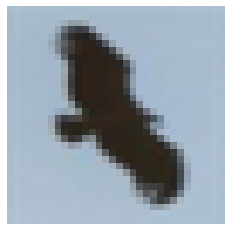

Prediction: airplane


In [13]:
import matplotlib.pyplot as plt
image = next(testiter)[0][0]
plt.axis('off')
plt.imshow(image.permute((1, 2, 0)))
plt.show()

pred = predict(vgg16_model, image.unsqueeze(dim=0))  # 由于模型接受的输入shape为4维（第1维为batch_size），因此需要使用unsqueeze函数在图片前面加一维
val_set = torchvision.datasets.CIFAR10(root='../dataset', train=False)
print('Prediction:', val_set.classes[pred])